# Análisis de datos del experimento 5:

## 1) Análisis de la base de datos:

In [16]:
#Número del experimento:
exp_num = 5

In [17]:
# Copio manualmente los siguientes datos del experimento para poder saber qué base de datos leer:
max_ruido_dB = -45 
add_noise = False 
snr = [-5, 20] 
tr_aug = [0.2, 3.1, 0.1] 
drr_aug = [-6, 19, 1]

filter_type = 'octave band' #Tipo de filtro a utilizar: 'octave band' o 'third octave band'
fs = 16000 #Frecuencia de sampleo de los audios.
order = 4 #Orden del filtro
bands = [250, 500, 1000, 2000, 4000, 8000] #Bandas a analizar

#La base de datos es: 
db_name = f'exp_reales_base_de_datos_{max_ruido_dB}_noise_{add_noise}_traug_{tr_aug[0]}_{tr_aug[1]}_{tr_aug[2]}_drraug_{drr_aug[0]}_{drr_aug[1]}_{drr_aug[2]}_snr_{snr[0]}_{snr[-1]}'

In [18]:
# Copio manualmente los datos de la red dentro del experimento para poder reconstruir el modelo:
#Parámetros de la red:
filters = [32, 18, 8, 4] 
kernel_size = [10, 5, 5, 5] 
activation = ['relu','relu','relu','relu'] 
pool_size = [2,2,2]
learning_rate = 0.001

In [19]:
# Importo paquetes:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle
import numpy as np
from scipy import stats
from progress.bar import IncrementalBar
import matplotlib

In [20]:
resumen_t30 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}
resumen_c50 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}
resumen_c80 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}
resumen_d50 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}

In [21]:
partitions = os.listdir(f'../cache/{db_name}')
db = pd.DataFrame()
bar = IncrementalBar('Reading data base', max = len(partitions))
for partition in partitions:
    #Leo la base de datos:
    with open(f'../cache/{db_name}/{partition}', "rb") as fh:
        aux_df = pickle.load(fh)
    db = db.append(aux_df, ignore_index=True)
    bar.next()
bar.finish()
db.head()

C:\Users\maxia\AppData\Local\Temp\ipykernel_21816\1374504097.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db = db.append(aux_df, ignore_index=True)


ReverbedAudio  banda  \
0   M3s5|classroom_15x45y|original    250   
1     M5s4|octagon_x06y03|original    250   
2     M3s4|octagon_x00y05|original    250   
3  F4s5|great_hall_x05y04|original    250   
4     F4s5|octagon_x01y11|original    250   

                                                 tae  \
0  [-0.015009822528197487, 0.21704163577006505, 0...   
1  [-0.0032639670083580725, 0.12534525287492787, ...   
2  [-0.025523891158869525, 0.16025394209163052, 0...   
3  [-0.01072438745878474, 0.0791612351706652, 0.1...   
4  [-0.0070242008924608626, 0.05490095447256112, ...   

                                         descriptors  snr       drr type_data  
0  [2.195798817302367, -10.270382987076696, -4.42...  NaN -6.050955     train  
1  [2.331708771388113, -0.5462915177225214, 0.706...  NaN -3.570122      test  
2  [2.486191663141252, -9.115218426214609, -2.758...  NaN -8.435587     train  
3  [2.2701578054934104, -1.7813550905041957, -1.0...  NaN -3.295375     train  
4  [2.3867369913685037, -14.465880133664124, -1.6...  NaN -5.693904     train

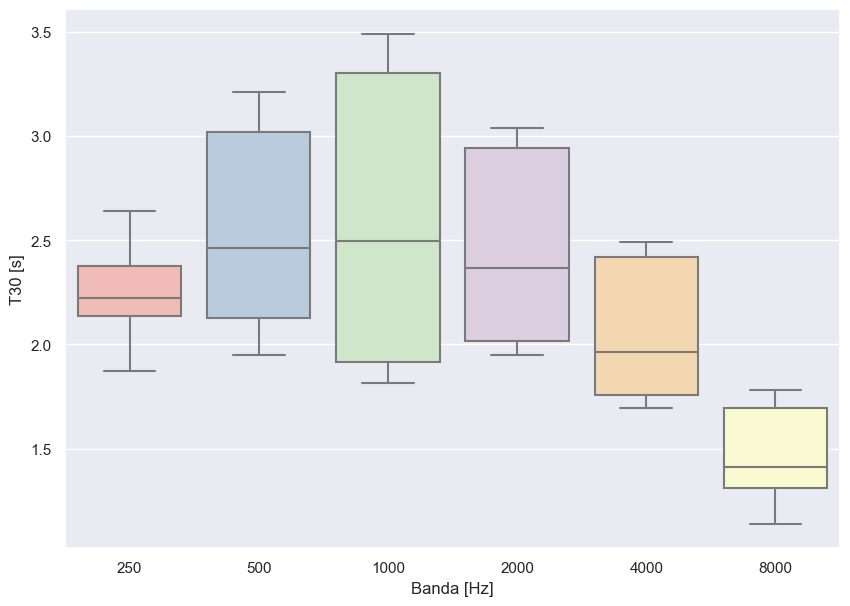

In [22]:
#Boxplot de los valores de T30 por bandas de frecuencia:

df_boxplot = pd.DataFrame({'Banda [Hz]': db.banda.to_list(), 
                           'DRR [dB]': db.drr.to_list(), 
                           'T30 [s]': list(map(lambda x: x[0], db.descriptors.to_list()))})

#plt.figure(figsize=(10,7))
sns.set(rc={'figure.figsize': (10, 7)})
sns.boxplot(x='Banda [Hz]', y='T30 [s]', data=df_boxplot, palette="Pastel1")
plt.show()

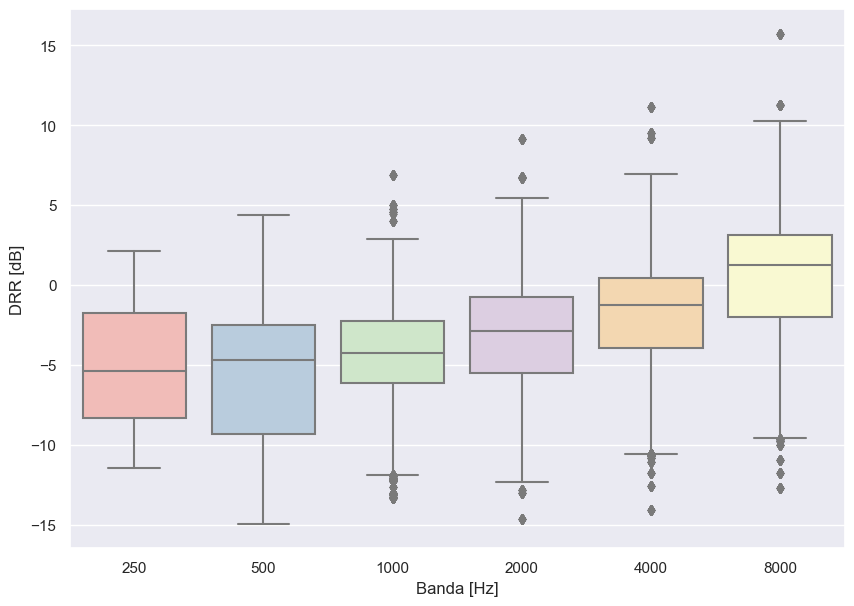

In [23]:
#Boxplot de los valores de DRR por bandas de frecuencia:

#plt.figure(figsize=(10,7))
sns.set(rc={'figure.figsize': (10, 7)})
sns.boxplot(x='Banda [Hz]', y='DRR [dB]', data=df_boxplot, palette="Pastel1")
plt.show()

In [24]:
#Veo cuántos audios hay por banda:
bands = [250, 500, 1000, 2000, 4000, 8000]

resumen_db = {'Banda [Hz]': [], 'Tot audios': [], }

for band in bands:

    tot_data_per_band = len(db.loc[db.banda == band])
    
    db_band = db.loc[db.banda == band]
    descriptors = db_band.descriptors.to_numpy()

    t30, c50, c80, d50 = [], [], [], []
    for values in descriptors:
        t30.append(values[0])
        c50.append(values[1])
        c80.append(values[2])
        d50.append(values[3])

    resumen_t30['Tot audios'].append(tot_data_per_band)
    resumen_t30['Percentil 95'].append(np.round(np.percentile(t30, 95),3))
    resumen_t30['Max'].append(np.round(np.max(t30),3))
    resumen_t30['Min'].append(np.round(np.min(t30),3))

    resumen_c50['Tot audios'].append(tot_data_per_band)
    resumen_c50['Percentil 95'].append(np.round(np.percentile(c50, 95),3))
    resumen_c50['Max'].append(np.round(np.max(c50),3))
    resumen_c50['Min'].append(np.round(np.min(c50),3))

    resumen_c80['Tot audios'].append(tot_data_per_band)
    resumen_c80['Percentil 95'].append(np.round(np.percentile(c80, 95),3))
    resumen_c80['Max'].append(np.round(np.max(c80),3))
    resumen_c80['Min'].append(np.round(np.min(c80),3))

    resumen_d50['Tot audios'].append(tot_data_per_band)
    resumen_d50['Percentil 95'].append(np.round(np.percentile(d50, 95),3))
    resumen_d50['Max'].append(np.round(np.max(d50),3))
    resumen_d50['Min'].append(np.round(np.min(d50),3))

In [25]:
#Tiempo de reverberación por banda y por sala:

great_hall = {'Name': [], 'Band': [], 'T30': []}
octagon = {'Name': [], 'Band': [], 'T30': []}
classroom = {'Name': [], 'Band': [], 'T30': []}

for i in range(len(db)):

    if ('great_hall' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]):
        great_hall['Name'].append(db.ReverbedAudio[i].split('|')[1])
        great_hall['Band'].append(db.banda[i])
        great_hall['T30'].append(db.descriptors[i][0])

    elif ('octagon' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]):
        octagon['Name'].append(db.ReverbedAudio[i].split('|')[1])
        octagon['Band'].append(db.banda[i])
        octagon['T30'].append(db.descriptors[i][0])

    elif ('classroom' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]):
        classroom['Name'].append(db.ReverbedAudio[i].split('|')[1])
        classroom['Band'].append(db.banda[i])
        classroom['T30'].append(db.descriptors[i][0])

df_great_hall = pd.DataFrame(great_hall)
df_octagon = pd.DataFrame(octagon)
df_classroom = pd.DataFrame(classroom)


for band in bands:
    print(f'\nBanda {band}:\n')
    df_great_hall_band = df_great_hall.loc[df_great_hall.Band == band]
    df_octagon_band = df_octagon.loc[df_octagon.Band == band]
    df_classroom_band = df_classroom.loc[df_classroom.Band == band]

    print(f'great_hall: Media: {np.round(np.mean(df_great_hall_band.T30.to_numpy()),2)}, Desvío: {np.round(np.std(df_great_hall_band.T30.to_numpy()),2)}')
    print(f'octagon: Media: {np.round(np.mean(df_octagon_band.T30.to_numpy()),2)}, Desvío: {np.round(np.std(df_octagon_band.T30.to_numpy()),2)}')
    print(f'classroom: Media: {np.round(np.mean(df_classroom_band.T30.to_numpy()),2)}, Desvío: {np.round(np.std(df_classroom_band.T30.to_numpy()),2)}')



Banda 250:

great_hall: Media: 2.18, Desvío: 0.17
octagon: Media: 2.4, Desvío: 0.11
classroom: Media: 2.18, Desvío: 0.11

Banda 500:

great_hall: Media: 2.44, Desvío: 0.07
octagon: Media: 3.05, Desvío: 0.06
classroom: Media: 2.06, Desvío: 0.05

Banda 1000:

great_hall: Media: 2.48, Desvío: 0.05
octagon: Media: 3.34, Desvío: 0.06
classroom: Media: 1.88, Desvío: 0.03

Banda 2000:

great_hall: Media: 2.35, Desvío: 0.06
octagon: Media: 2.95, Desvío: 0.03
classroom: Media: 1.99, Desvío: 0.02

Banda 4000:

great_hall: Media: 1.93, Desvío: 0.07
octagon: Media: 2.42, Desvío: 0.04
classroom: Media: 1.74, Desvío: 0.02

Banda 8000:

great_hall: Media: 1.38, Desvío: 0.06
octagon: Media: 1.71, Desvío: 0.04
classroom: Media: 1.3, Desvío: 0.01


## 2) Análisis del entrenamiento:

In [26]:
resumen_training = {'Banda [Hz]': [], 'Loss': [], 'Validation loss': []}

### Análisis banda 250 Hz:

In [27]:
band = 250

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)
resumen_training['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

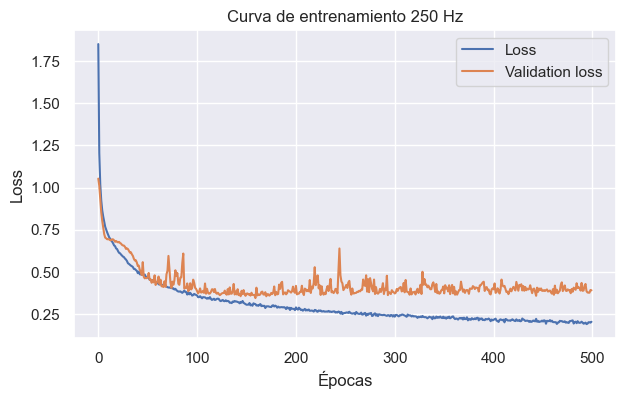

In [28]:
resumen_training['Loss'].append(results['loss'][-1])
resumen_training['Validation loss'].append(results['val_loss'][-1])

#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([ 33.,  75., 180., 161., 207., 265.,  89.,  28.]),
 array([-0.16   , -0.12125, -0.0825 , -0.04375, -0.005  ,  0.03375,
         0.0725 ,  0.11125,  0.15   ]),
 <BarContainer object of 8 artists>)

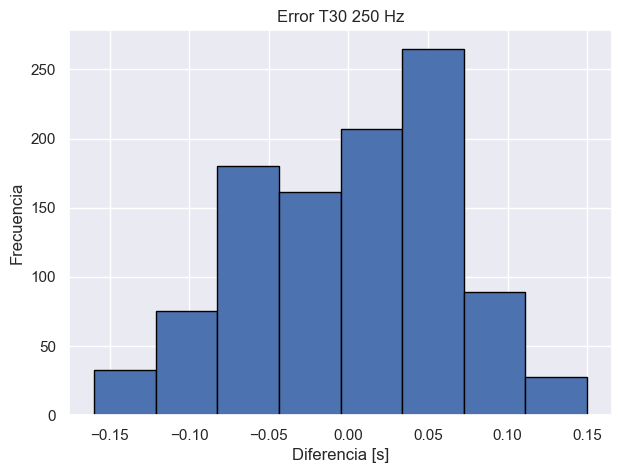

In [29]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([  2., 136., 770.,  92.,  11.,   6.,  14.,   7.]),
 array([-3.31   , -1.87625, -0.4425 ,  0.99125,  2.425  ,  3.85875,
         5.2925 ,  6.72625,  8.16   ]),
 <BarContainer object of 8 artists>)

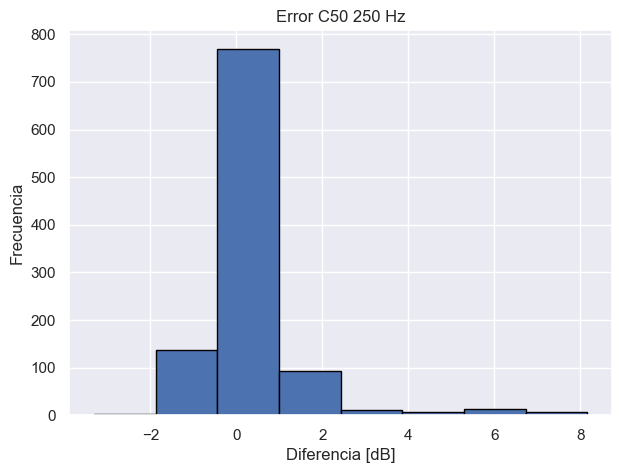

In [30]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([  4.,  54., 206., 388., 252.,  81.,  44.,   9.]),
 array([-1.29   , -0.92375, -0.5575 , -0.19125,  0.175  ,  0.54125,
         0.9075 ,  1.27375,  1.64   ]),
 <BarContainer object of 8 artists>)

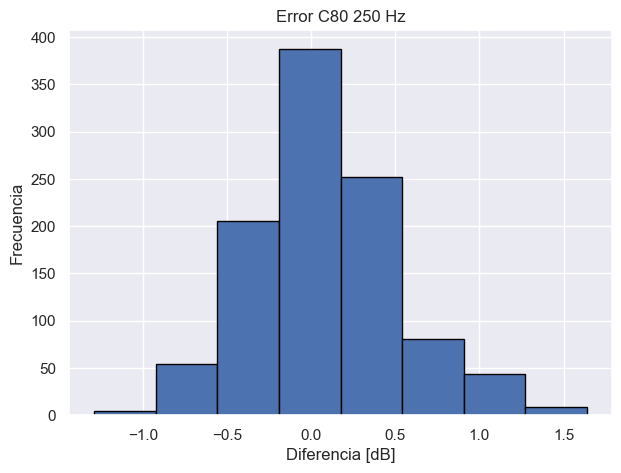

In [31]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([ 18., 107., 243., 314., 241.,  94.,  18.,   3.]),
 array([-0.45, -0.31, -0.17, -0.03,  0.11,  0.25,  0.39,  0.53,  0.67]),
 <BarContainer object of 8 artists>)

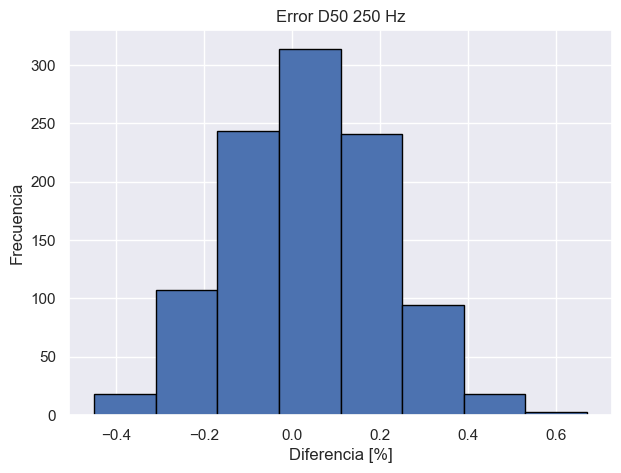

In [32]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

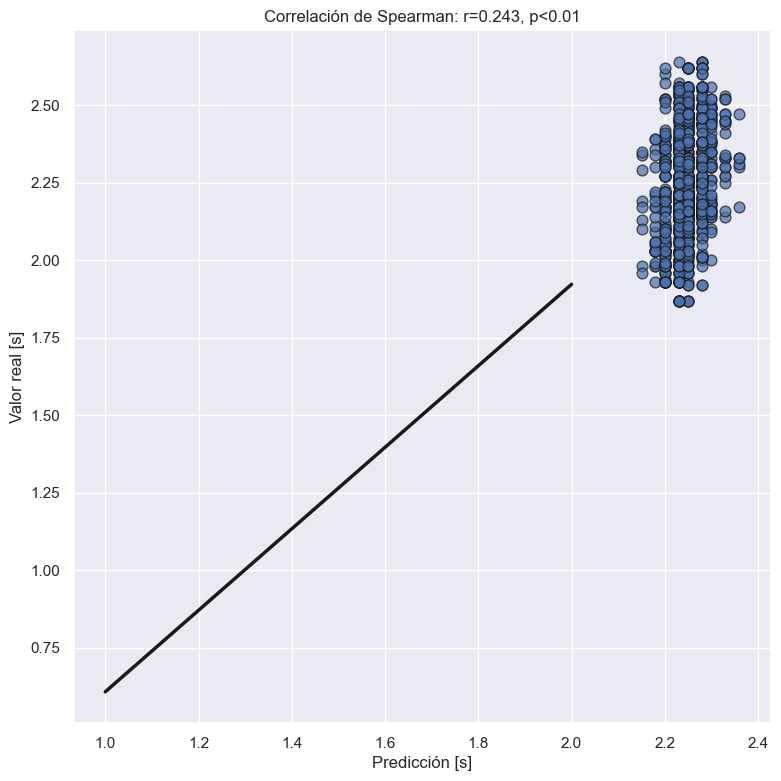

In [33]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

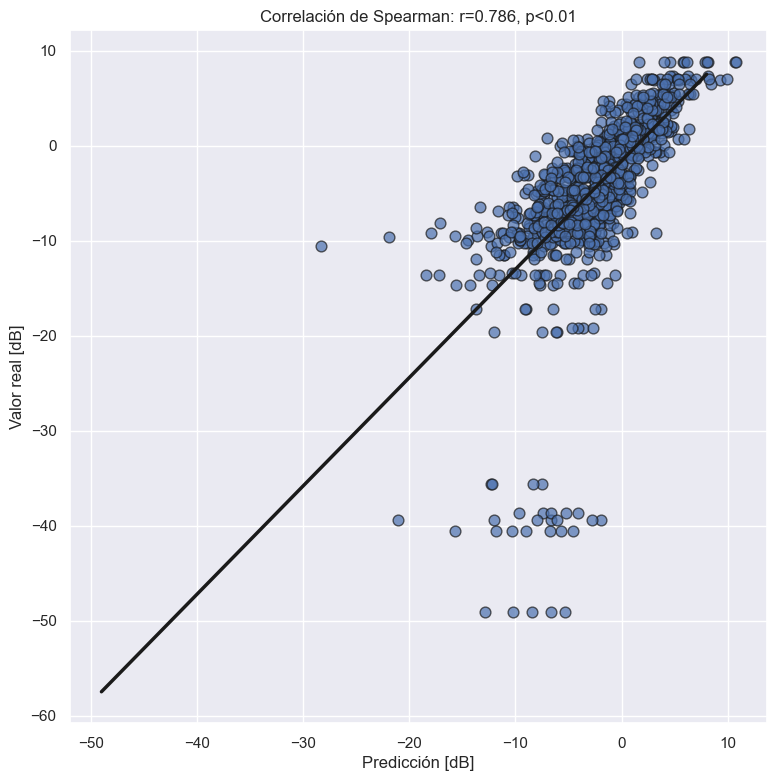

In [34]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

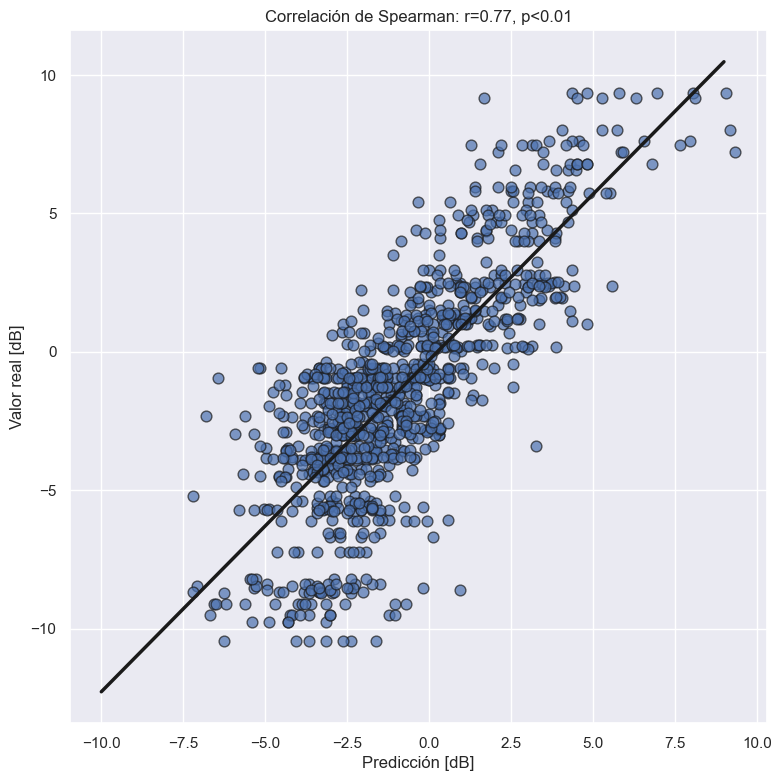

In [35]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

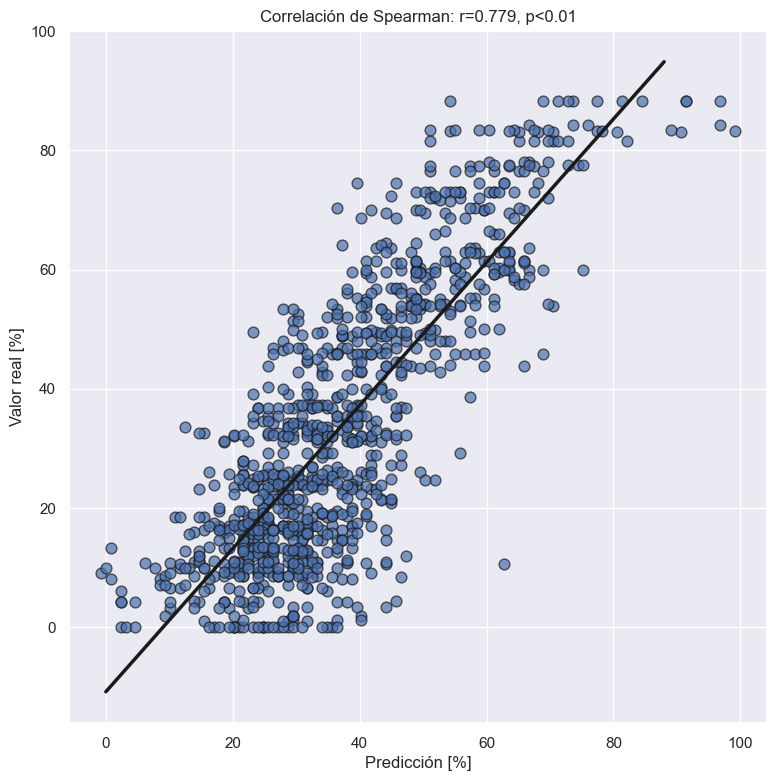

In [36]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 500 Hz:

In [37]:
band = 500

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)
resumen_training['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

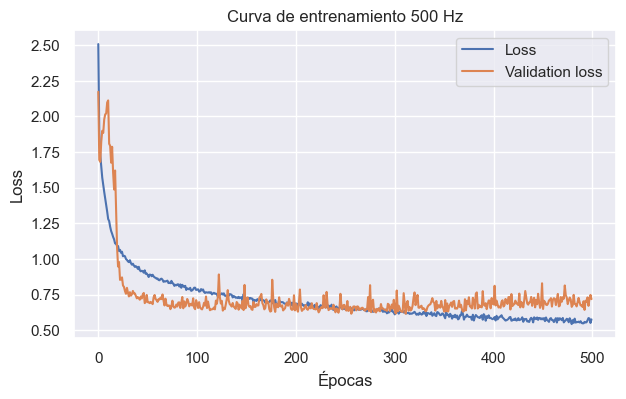

In [38]:
resumen_training['Loss'].append(results['loss'][-1])
resumen_training['Validation loss'].append(results['val_loss'][-1])

#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([ 68., 371., 340., 190., 482., 345., 386.,  63.]),
 array([-0.28 , -0.215, -0.15 , -0.085, -0.02 ,  0.045,  0.11 ,  0.175,
         0.24 ]),
 <BarContainer object of 8 artists>)

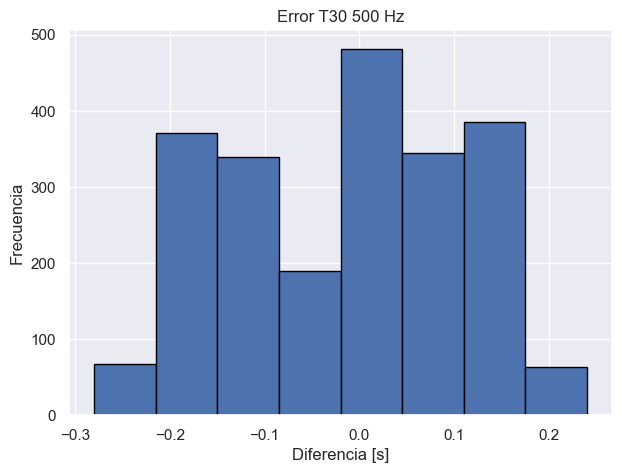

In [39]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([  11.,  311., 1798.,   95.,   13.,    4.,   10.,    3.]),
 array([-7.46   , -4.24625, -1.0325 ,  2.18125,  5.395  ,  8.60875,
        11.8225 , 15.03625, 18.25   ]),
 <BarContainer object of 8 artists>)

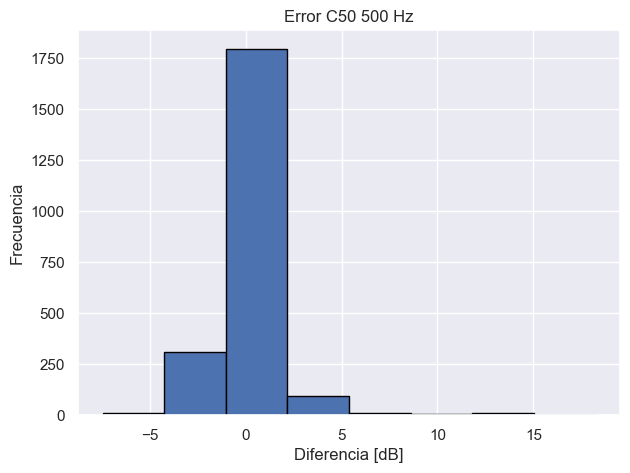

In [40]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([   3.,   64.,  660., 1165.,  276.,   37.,   32.,    8.]),
 array([-2.19   , -1.50625, -0.8225 , -0.13875,  0.545  ,  1.22875,
         1.9125 ,  2.59625,  3.28   ]),
 <BarContainer object of 8 artists>)

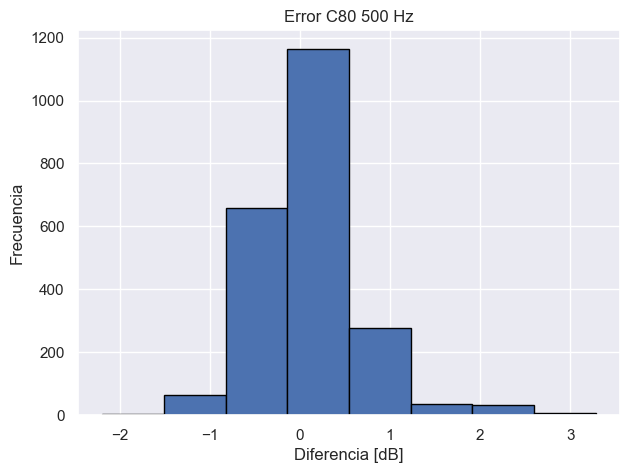

In [41]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  3.,  46., 246., 707., 829., 317.,  86.,  11.]),
 array([-0.6 , -0.45, -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,  0.6 ]),
 <BarContainer object of 8 artists>)

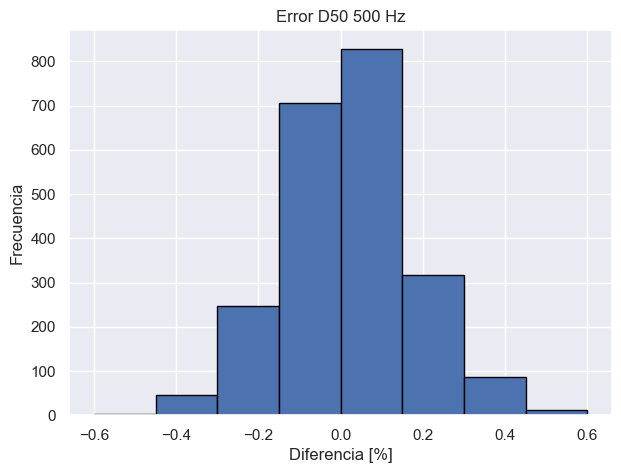

In [42]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

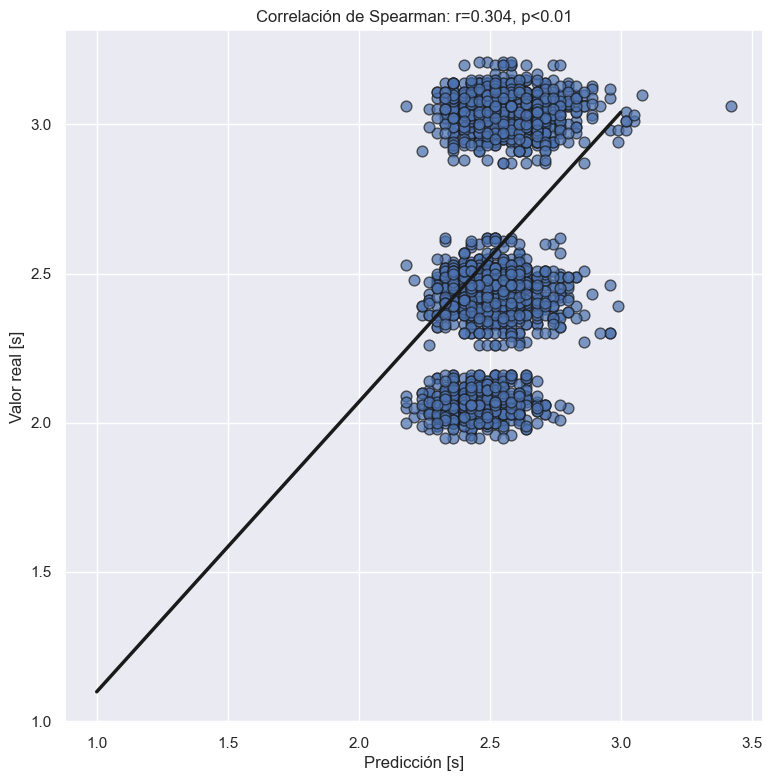

In [43]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

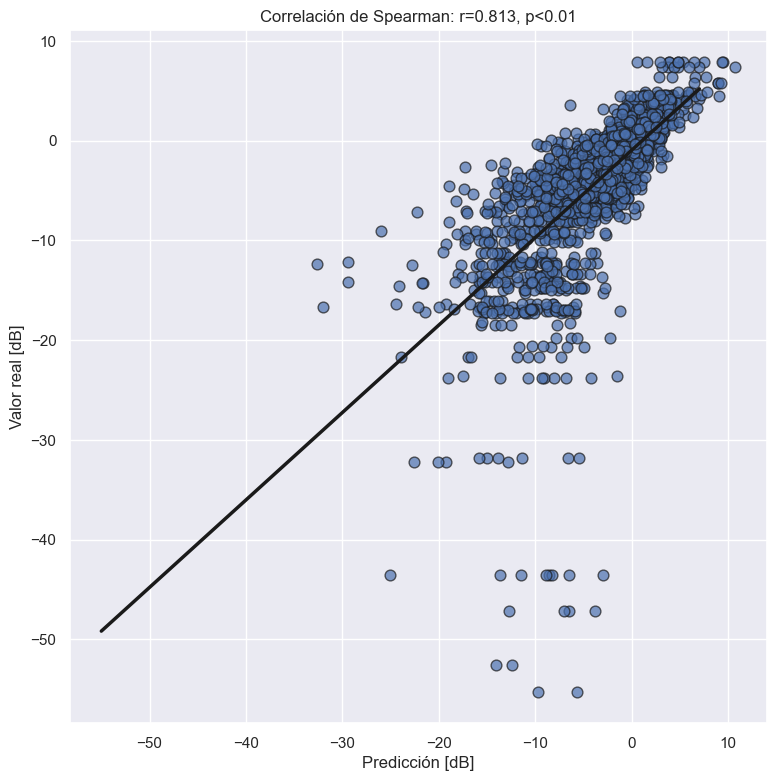

In [44]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

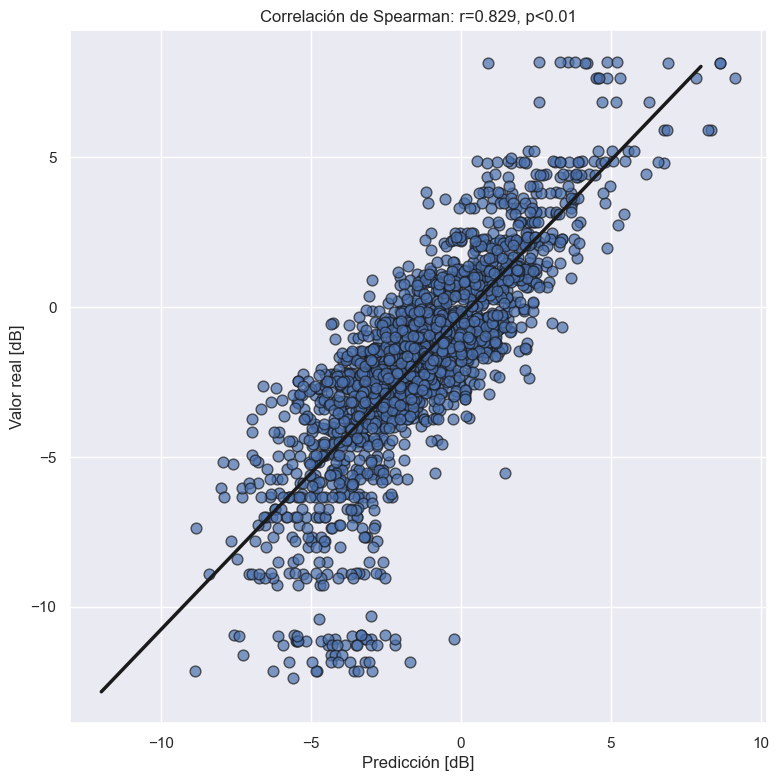

In [45]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

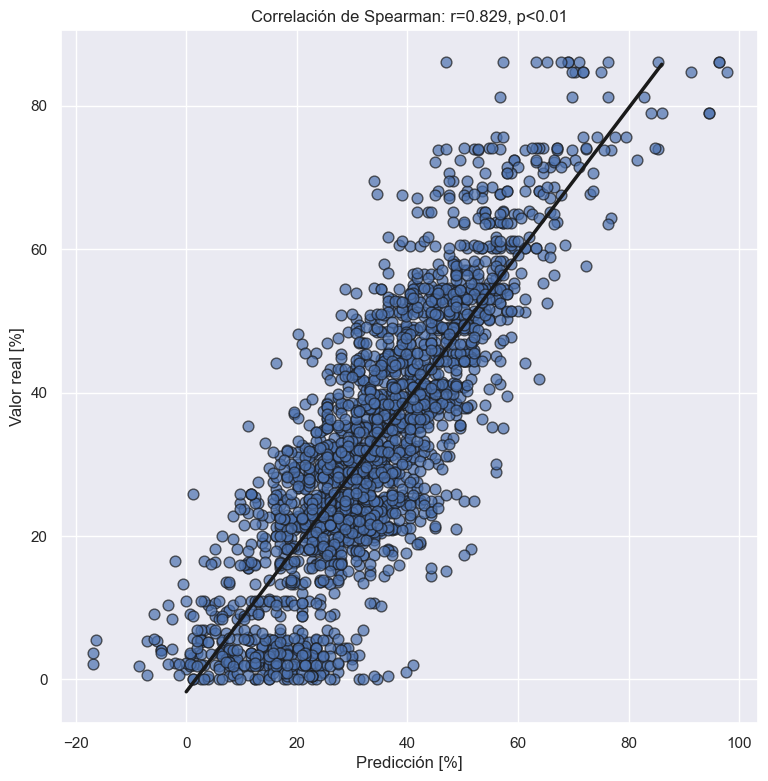

In [46]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 1000 Hz:

In [47]:
band = 1000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)
resumen_training['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

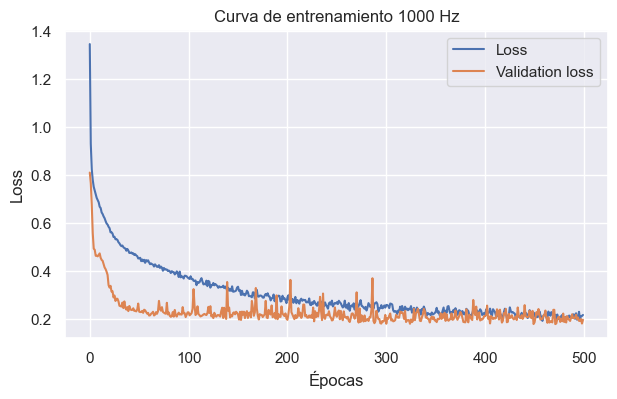

In [48]:
resumen_training['Loss'].append(results['loss'][-1])
resumen_training['Validation loss'].append(results['val_loss'][-1])

#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([173., 468., 192., 250., 391., 379., 366.,  26.]),
 array([-0.27 , -0.185, -0.1  , -0.015,  0.07 ,  0.155,  0.24 ,  0.325,
         0.41 ]),
 <BarContainer object of 8 artists>)

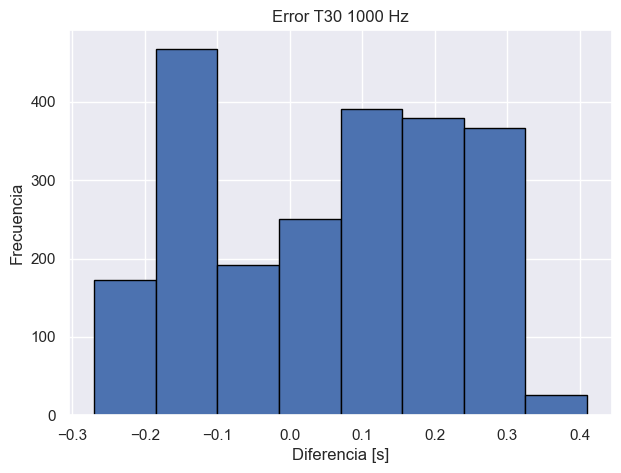

In [49]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([9.300e+01, 2.111e+03, 1.100e+01, 2.000e+01, 2.000e+00, 1.000e+00,
        2.000e+00, 5.000e+00]),
 array([-3.34   , -0.69625,  1.9475 ,  4.59125,  7.235  ,  9.87875,
        12.5225 , 15.16625, 17.81   ]),
 <BarContainer object of 8 artists>)

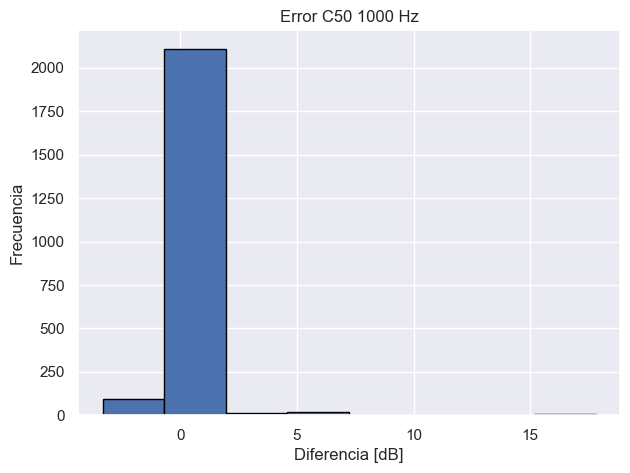

In [50]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([  1.,   5.,  32., 247., 825., 926., 191.,  18.]),
 array([-1.86, -1.48, -1.1 , -0.72, -0.34,  0.04,  0.42,  0.8 ,  1.18]),
 <BarContainer object of 8 artists>)

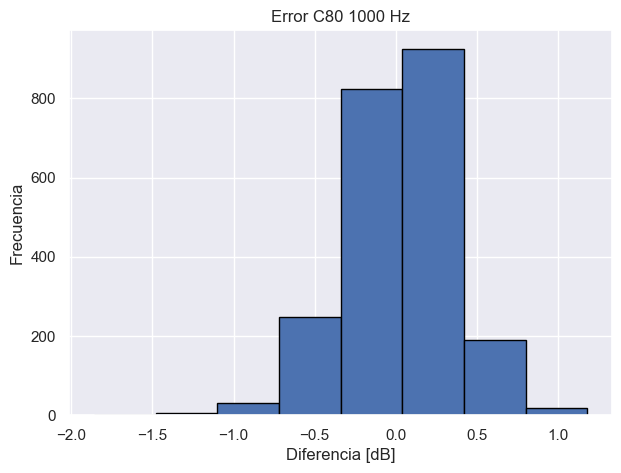

In [51]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([   9.,  189., 1098.,  789.,  117.,   33.,    7.,    3.]),
 array([-0.41   , -0.25625, -0.1025 ,  0.05125,  0.205  ,  0.35875,
         0.5125 ,  0.66625,  0.82   ]),
 <BarContainer object of 8 artists>)

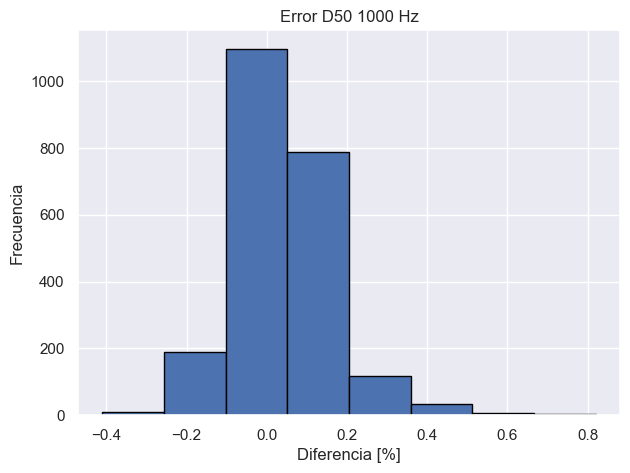

In [52]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

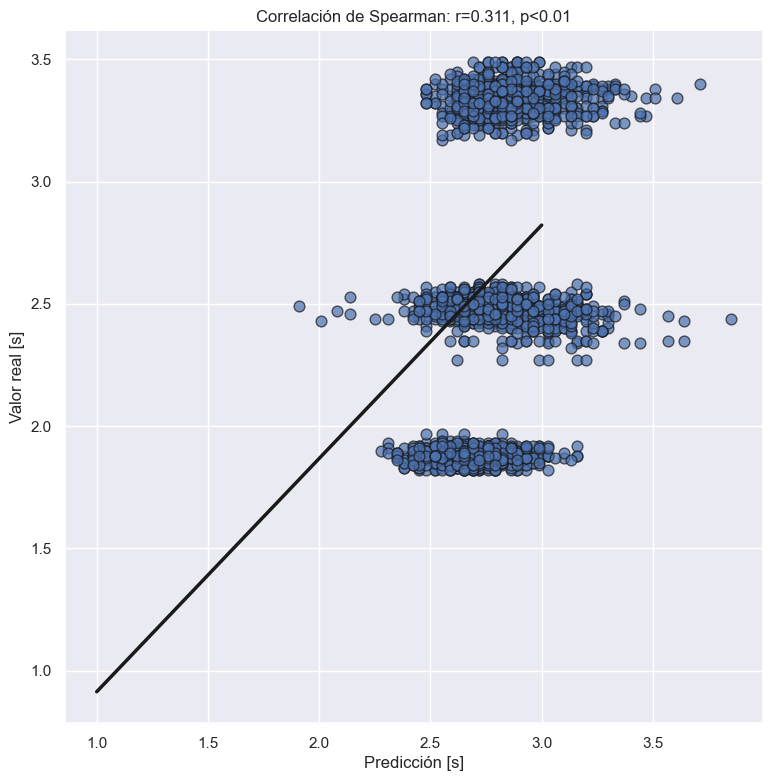

In [53]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

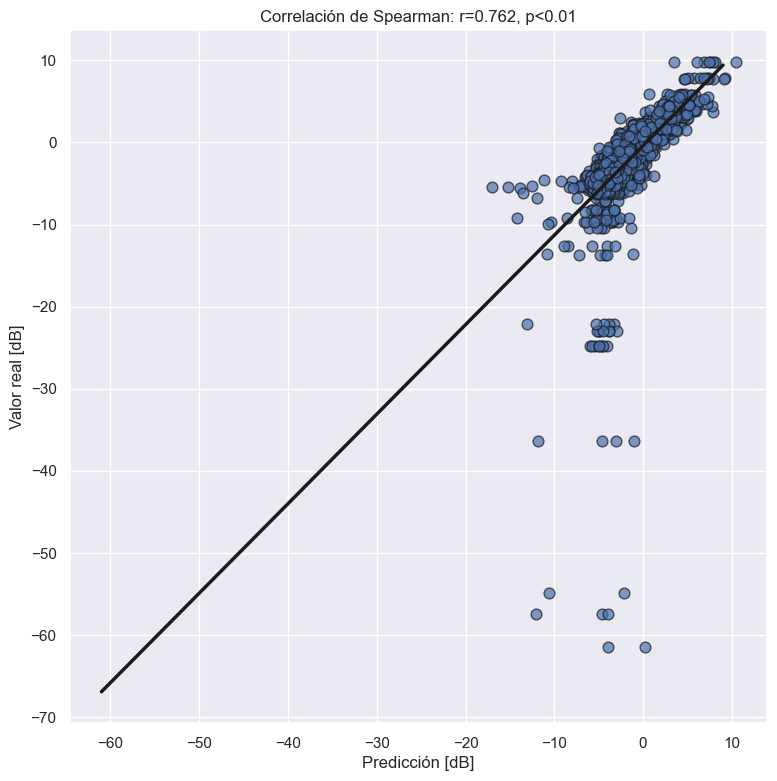

In [54]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

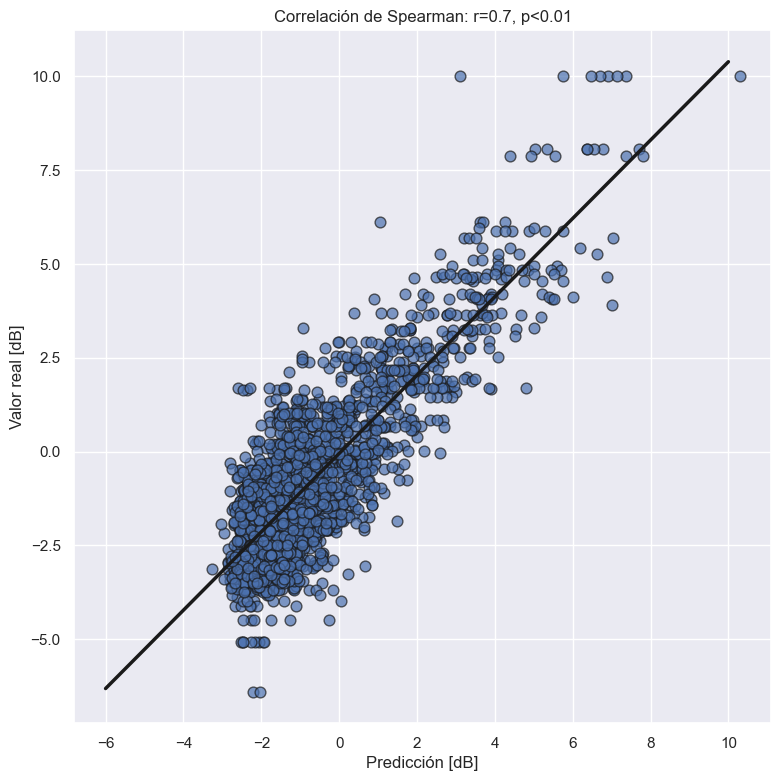

In [55]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

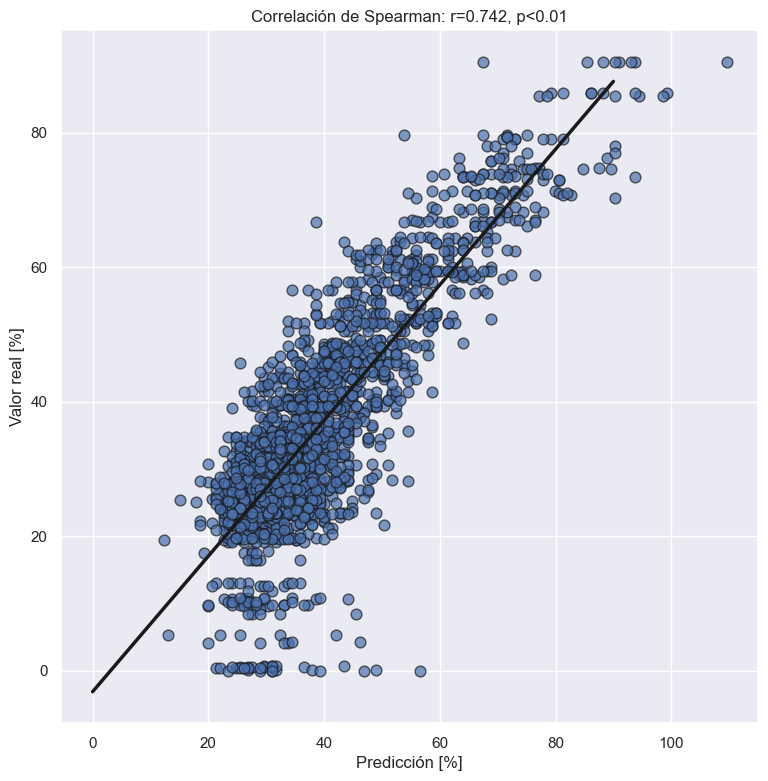

In [56]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 2000 Hz:

In [57]:
band = 2000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)
resumen_training['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

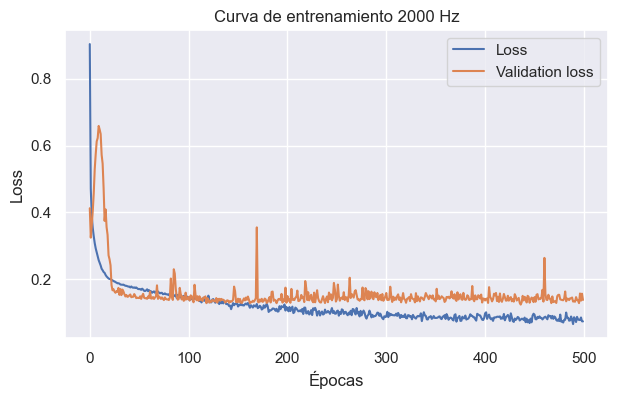

In [58]:
resumen_training['Loss'].append(results['loss'][-1])
resumen_training['Validation loss'].append(results['val_loss'][-1])

#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([167., 459., 211., 115., 444., 604., 222.,  23.]),
 array([-0.25   , -0.18625, -0.1225 , -0.05875,  0.005  ,  0.06875,
         0.1325 ,  0.19625,  0.26   ]),
 <BarContainer object of 8 artists>)

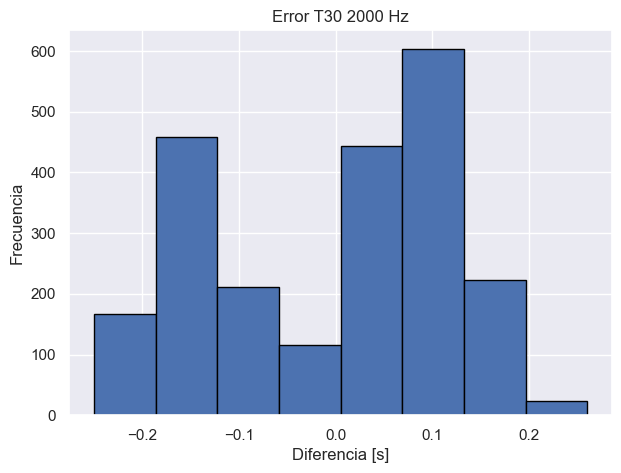

In [59]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([4.000e+00, 2.155e+03, 7.300e+01, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 8.000e+00]),
 array([-3.57  , -1.5025,  0.565 ,  2.6325,  4.7   ,  6.7675,  8.835 ,
        10.9025, 12.97  ]),
 <BarContainer object of 8 artists>)

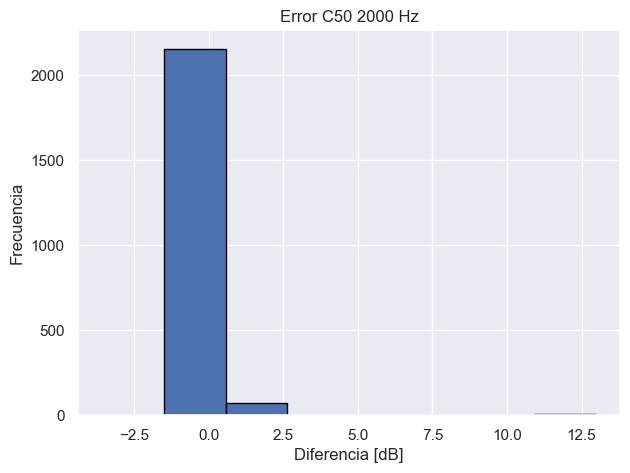

In [60]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([  4.,  34., 250., 646., 885., 360.,  54.,  12.]),
 array([-0.91   , -0.70625, -0.5025 , -0.29875, -0.095  ,  0.10875,
         0.3125 ,  0.51625,  0.72   ]),
 <BarContainer object of 8 artists>)

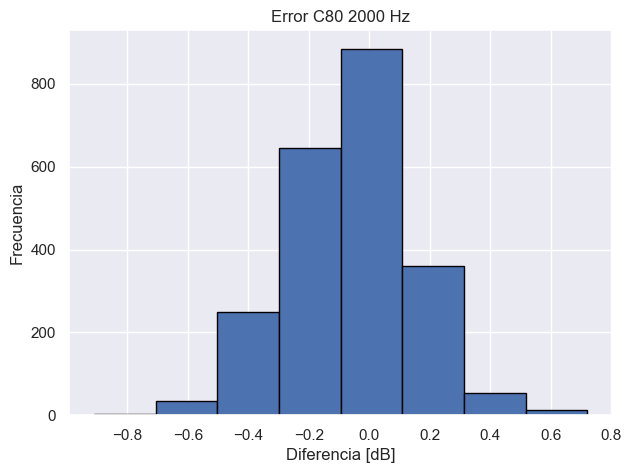

In [61]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  11.,  257., 1229.,  627.,   86.,   22.,    7.,    6.]),
 array([-0.37   , -0.23875, -0.1075 ,  0.02375,  0.155  ,  0.28625,
         0.4175 ,  0.54875,  0.68   ]),
 <BarContainer object of 8 artists>)

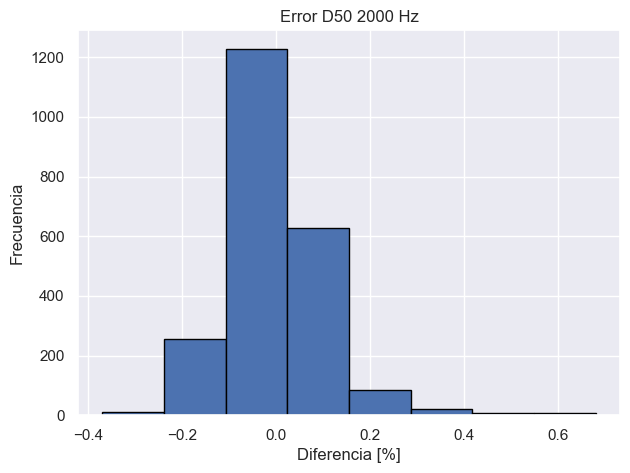

In [62]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

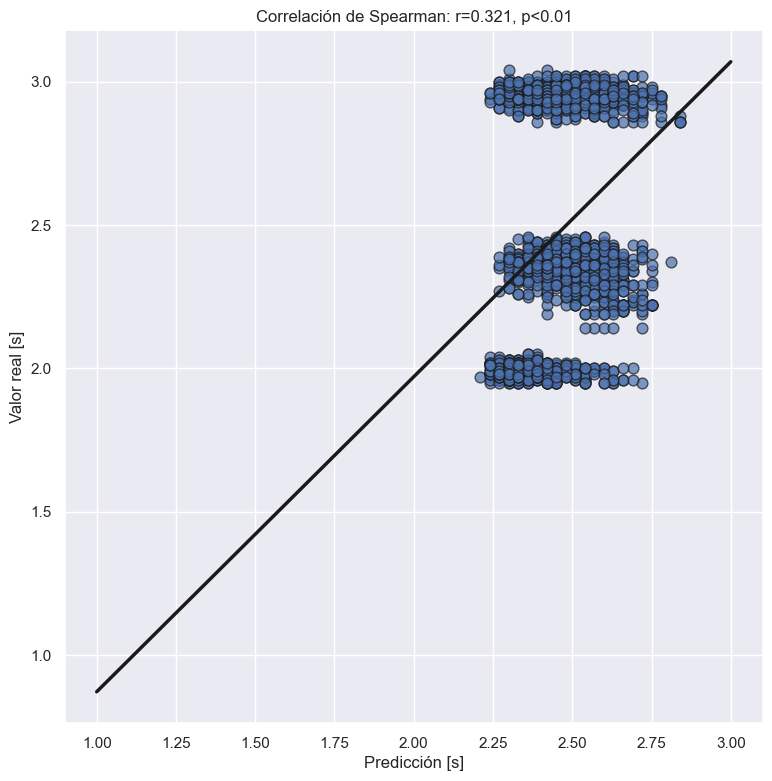

In [63]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

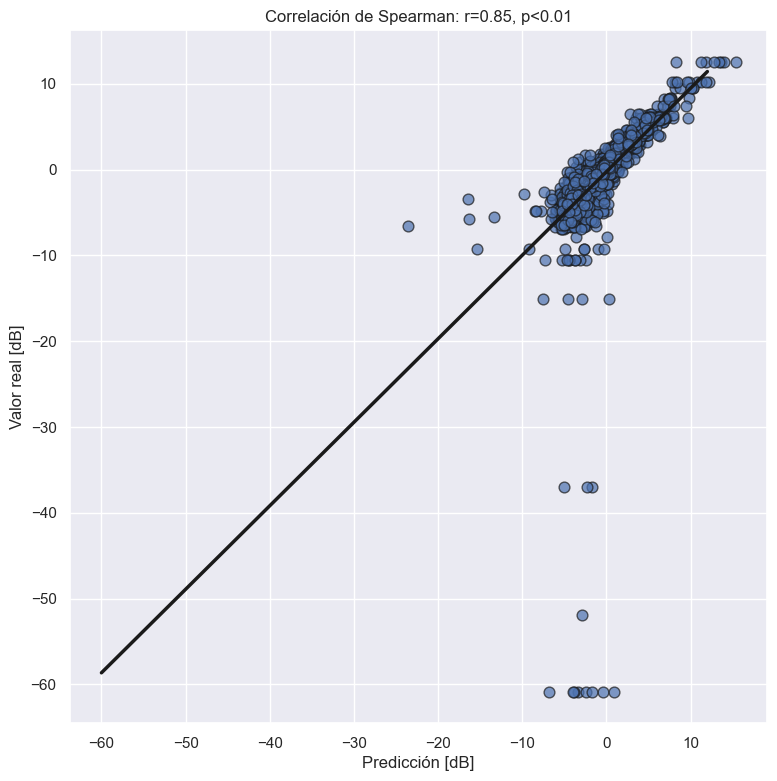

In [64]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

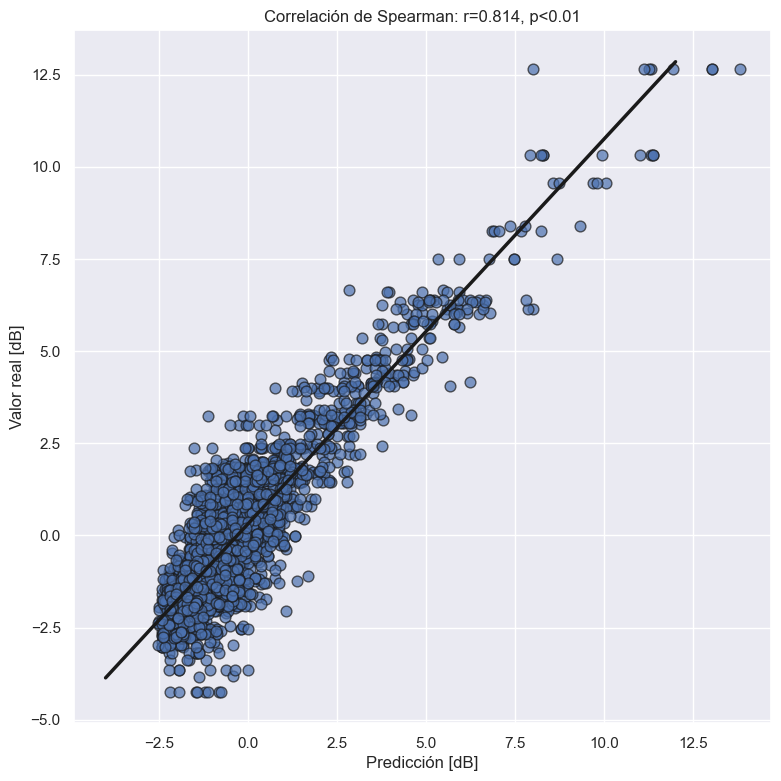

In [65]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

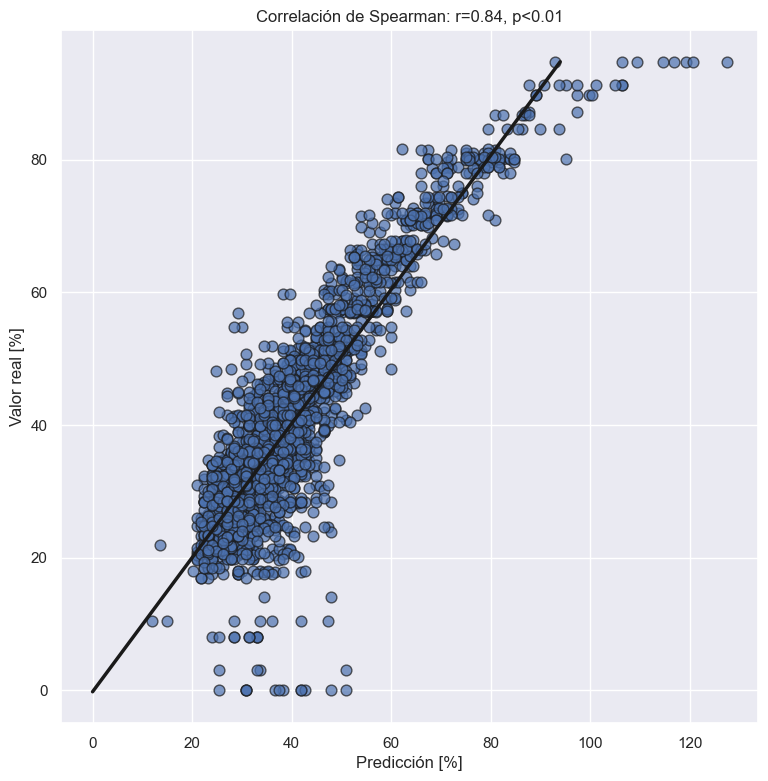

In [66]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 4000 Hz:

In [67]:
band = 4000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)
resumen_training['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

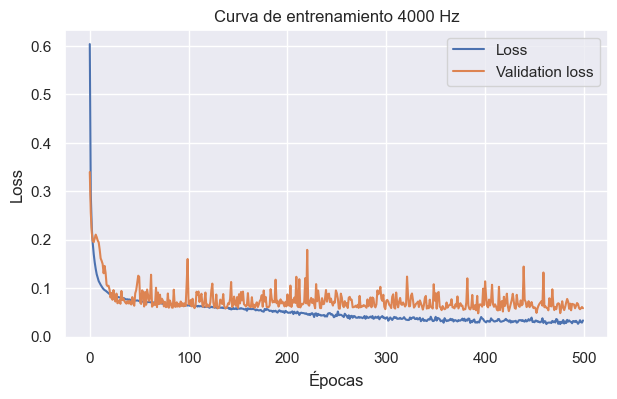

In [68]:
resumen_training['Loss'].append(results['loss'][-1])
resumen_training['Validation loss'].append(results['val_loss'][-1])

#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  9.,  50., 148., 305., 702., 794., 213.,  24.]),
 array([-0.23   , -0.16625, -0.1025 , -0.03875,  0.025  ,  0.08875,
         0.1525 ,  0.21625,  0.28   ]),
 <BarContainer object of 8 artists>)

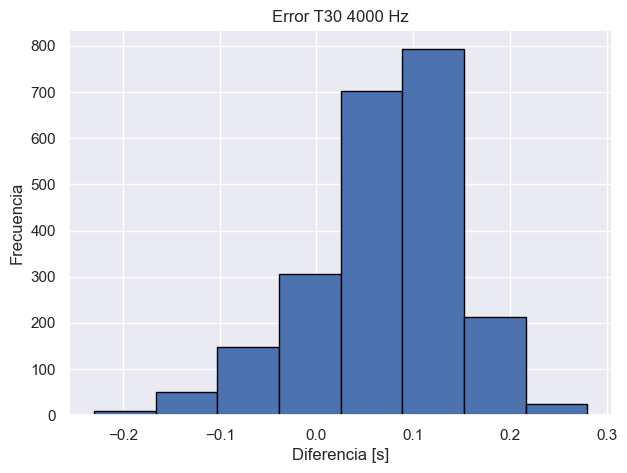

In [69]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([2.000e+00, 8.000e+00, 1.695e+03, 5.360e+02, 1.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([-4.42 , -2.915, -1.41 ,  0.095,  1.6  ,  3.105,  4.61 ,  6.115,
         7.62 ]),
 <BarContainer object of 8 artists>)

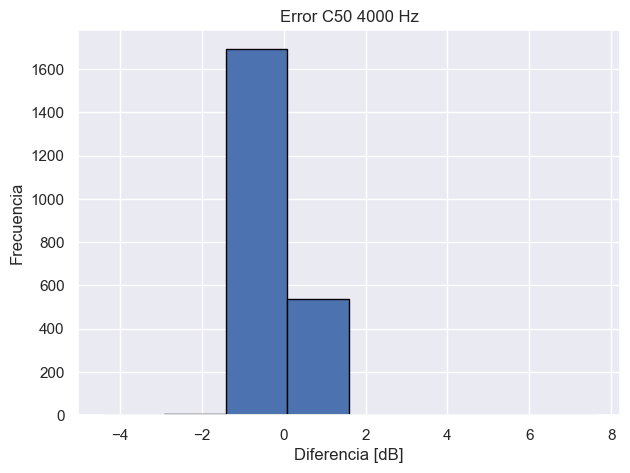

In [70]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([  3.,  48., 316., 850., 777., 200.,  48.,   3.]),
 array([-0.55  , -0.4175, -0.285 , -0.1525, -0.02  ,  0.1125,  0.245 ,
         0.3775,  0.51  ]),
 <BarContainer object of 8 artists>)

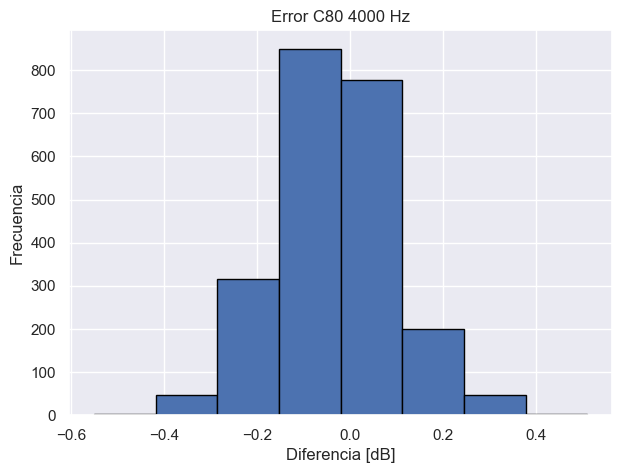

In [71]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  73.,  990., 1022.,  138.,   15.,    3.,    0.,    4.]),
 array([-0.23  , -0.1175, -0.005 ,  0.1075,  0.22  ,  0.3325,  0.445 ,
         0.5575,  0.67  ]),
 <BarContainer object of 8 artists>)

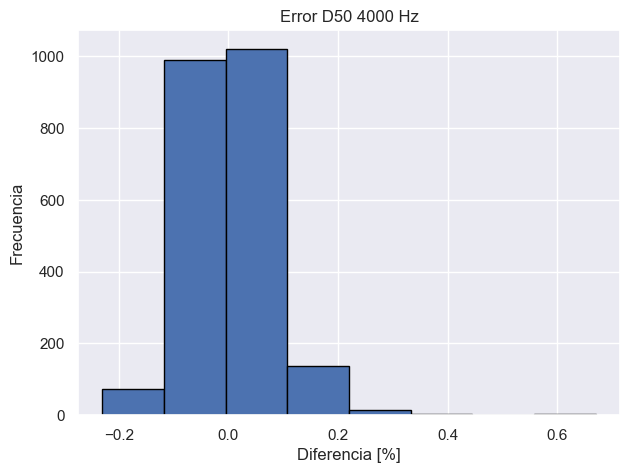

In [72]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

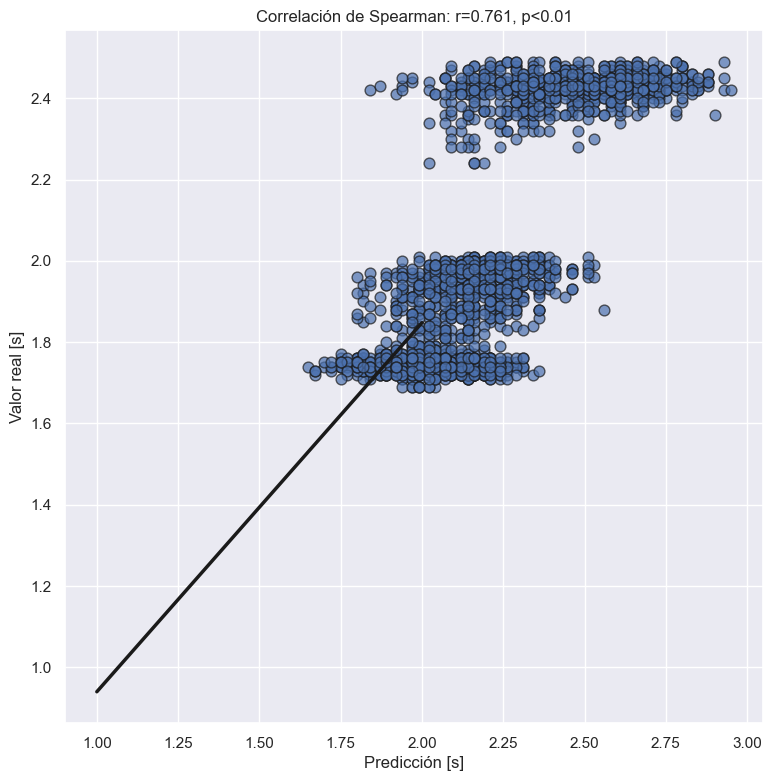

In [73]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

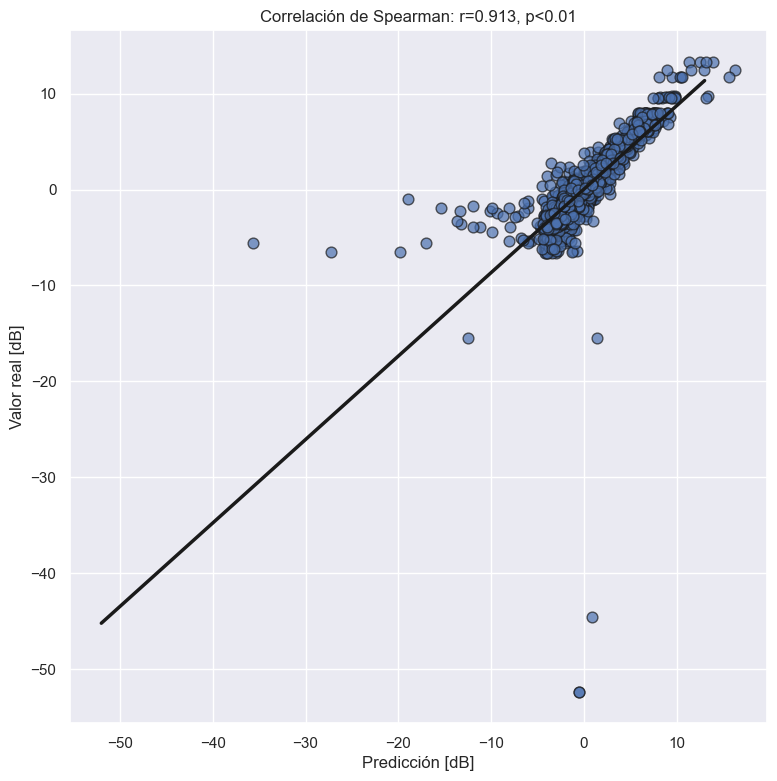

In [74]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

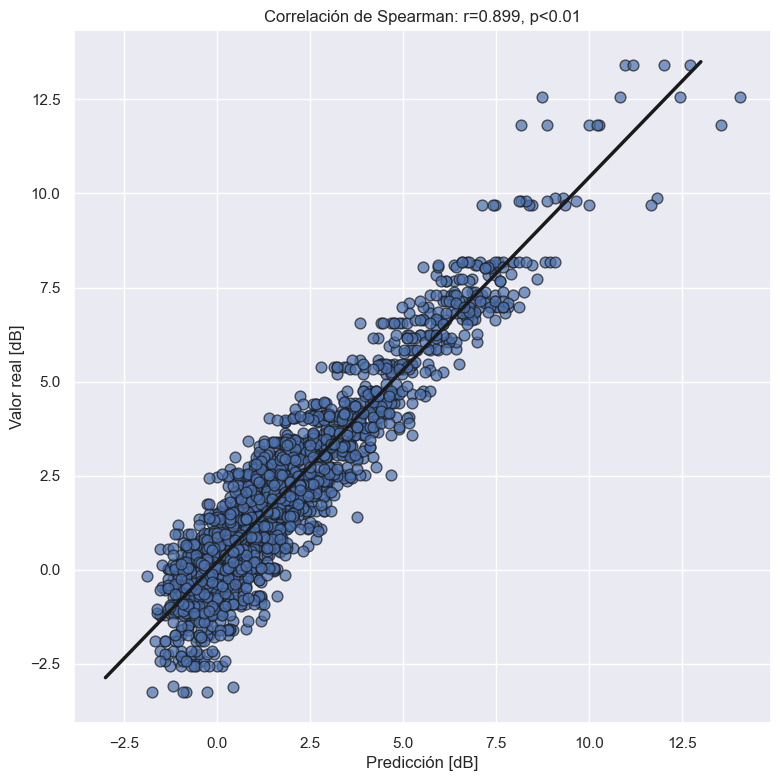

In [75]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

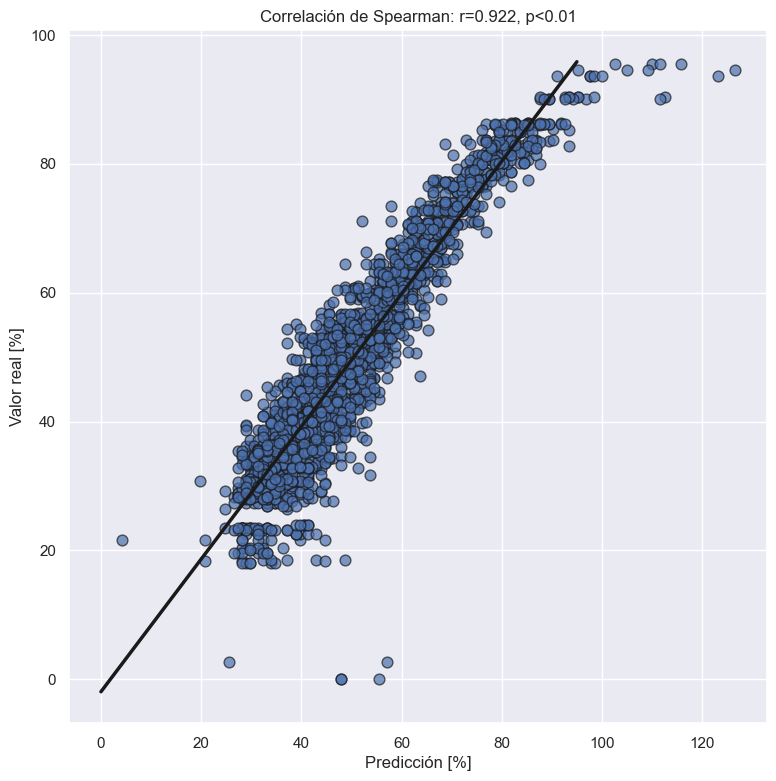

In [76]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 8000 Hz:

In [77]:
band = 8000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)
resumen_training['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

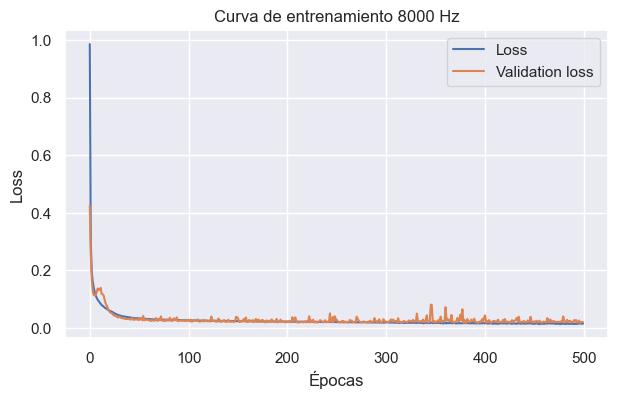

In [78]:
resumen_training['Loss'].append(results['loss'][-1])
resumen_training['Validation loss'].append(results['val_loss'][-1])

#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([ 25., 154., 607., 723., 597., 117.,  18.,   4.]),
 array([-0.19 , -0.135, -0.08 , -0.025,  0.03 ,  0.085,  0.14 ,  0.195,
         0.25 ]),
 <BarContainer object of 8 artists>)

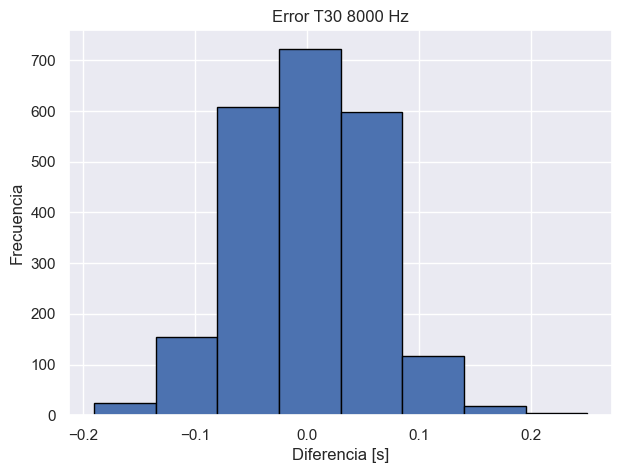

In [79]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([8.44e+02, 1.39e+03, 6.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 4.00e+00]),
 array([-0.7    , -0.07375,  0.5525 ,  1.17875,  1.805  ,  2.43125,
         3.0575 ,  3.68375,  4.31   ]),
 <BarContainer object of 8 artists>)

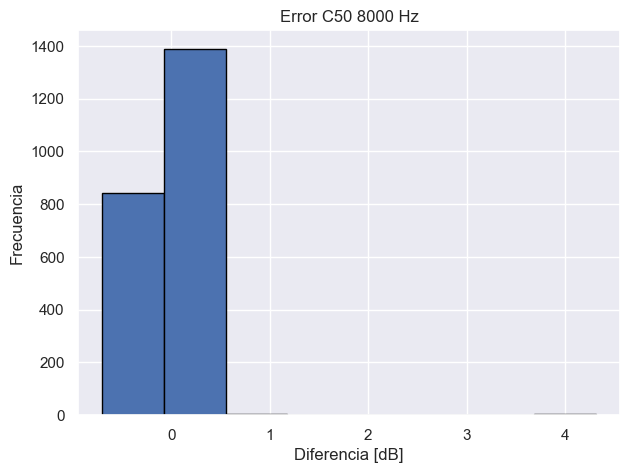

In [80]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([   3.,    9.,   93.,  855., 1017.,  235.,   30.,    3.]),
 array([-0.54   , -0.42125, -0.3025 , -0.18375, -0.065  ,  0.05375,
         0.1725 ,  0.29125,  0.41   ]),
 <BarContainer object of 8 artists>)

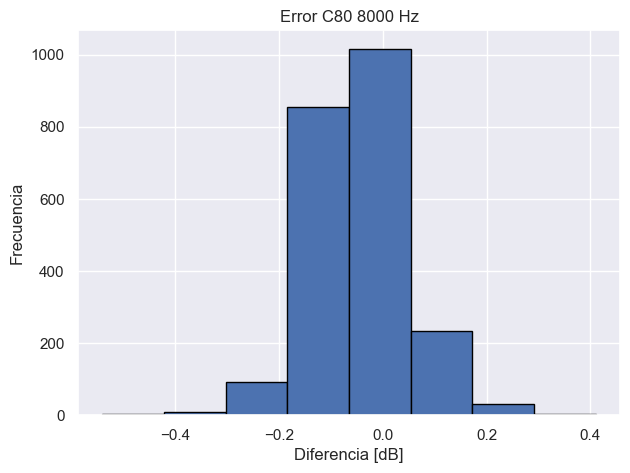

In [81]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  13., 1132.,  985.,   94.,   11.,    3.,    3.,    4.]),
 array([-0.27   , -0.15125, -0.0325 ,  0.08625,  0.205  ,  0.32375,
         0.4425 ,  0.56125,  0.68   ]),
 <BarContainer object of 8 artists>)

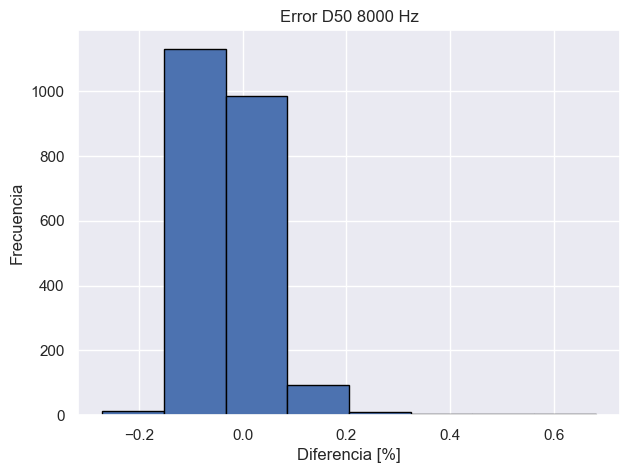

In [82]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

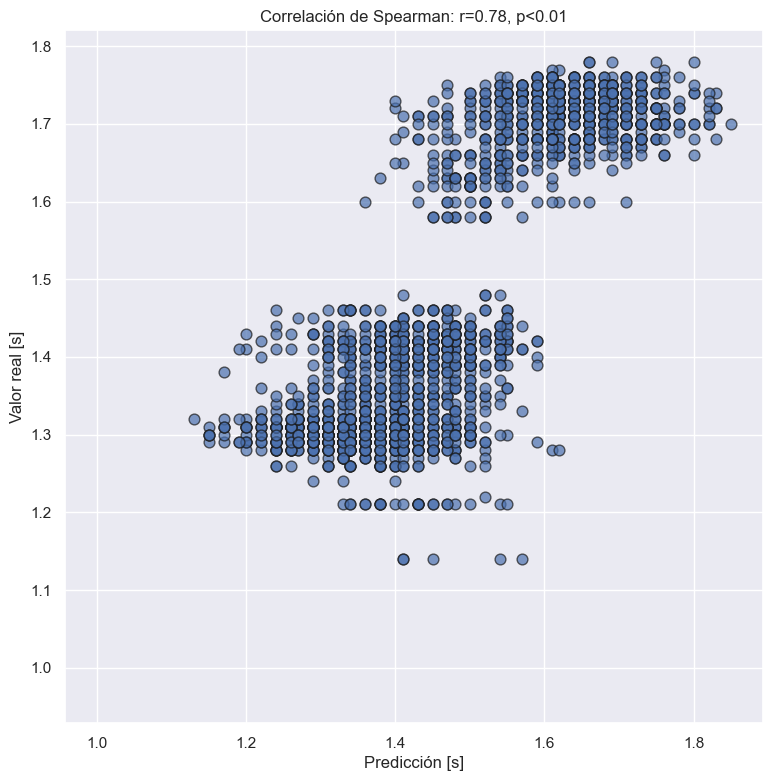

In [83]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

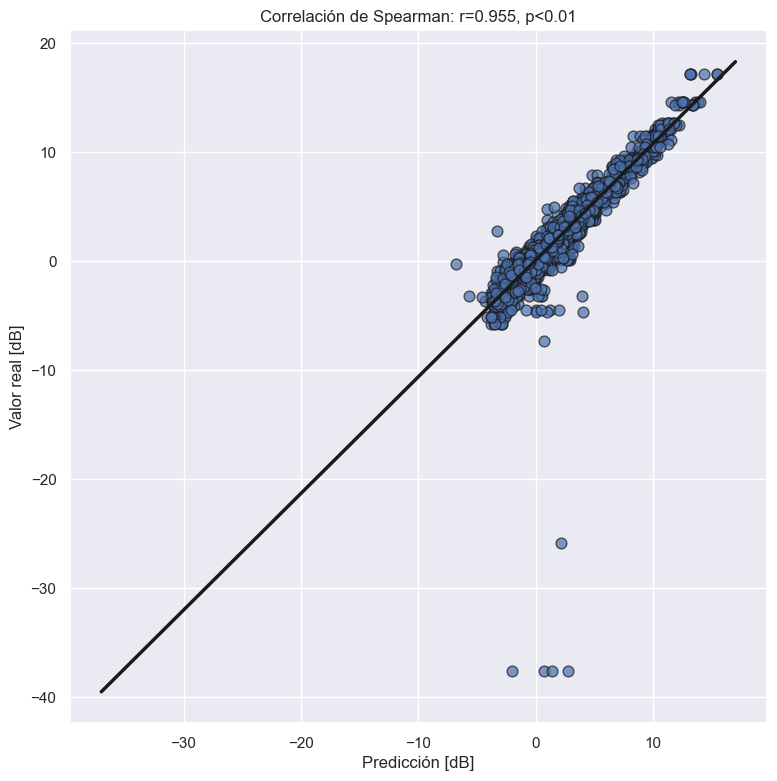

In [84]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

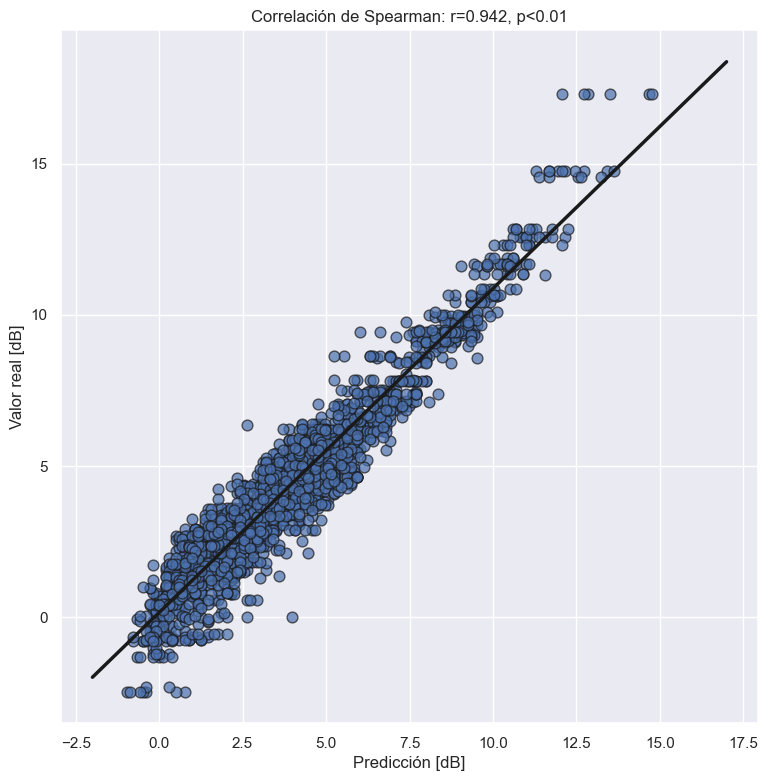

In [85]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

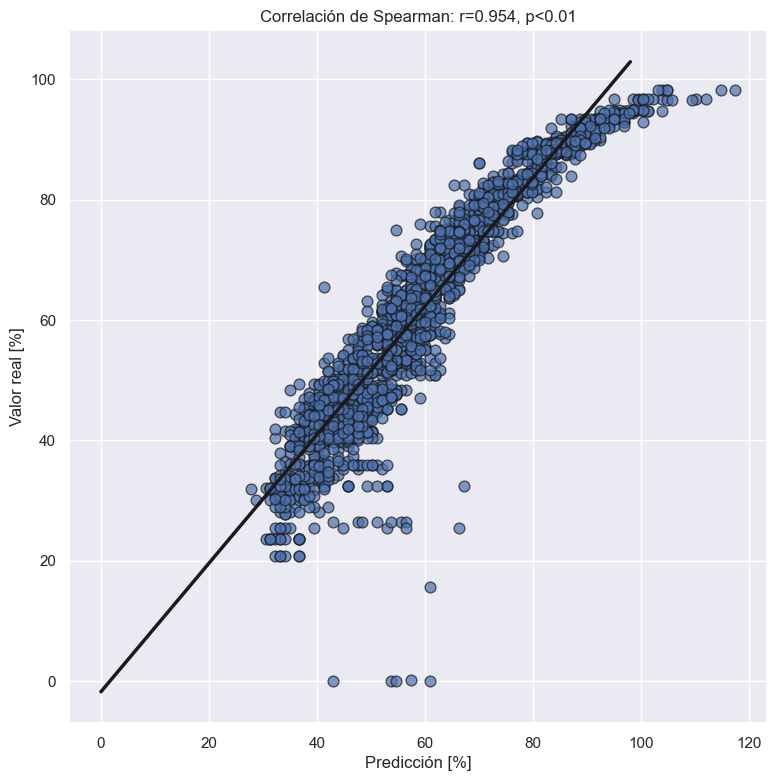

In [86]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

## 3) Estimación con el modelo entrenado:

In [87]:
from sklearn.model_selection import train_test_split
from scipy.signal import butter
from librosa import load
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append('../code')
import modeling
from parameters_calculation import TAE
from parameters_calculation import clarity
from parameters_calculation import definition
from parameters_calculation import tr_lundeby, NoiseError
from parameters_calculation import BandpassFilter

bpfilter = BandpassFilter(filter_type, fs, order, bands) #Instancio la clase de los filtros

sos_lowpass_filter = butter(order, 20, fs=fs, btype='lowpass', output='sos')

blind_estimation_model = modeling.model(filters, kernel_size, activation, pool_size, learning_rate)

In [88]:
def get_parameters(rir, filter_):
    
    filtered_rir = filter_.filtered_signals(rir)

    rir_parameters = []
    for audio in filtered_rir:
        t30, _, _ = tr_lundeby(audio, fs, max_ruido_dB)
        c50 = clarity(50, audio, fs)
        c80 = clarity(80, audio, fs)
        d50 = definition(audio, fs)

        rir_parameters.append([np.round(t30,3), np.round(c50,3), np.round(c80,3), np.round(d50,3)])

    return rir_parameters

def get_tae_per_band(speech, filter_, fs, sos_lowpass):
    
    filtered_speech = filter_.filtered_signals(list(speech))

    tae_per_band = []
    for audio in filtered_speech:
        audio = audio/np.max(np.abs(audio))
        tae_per_band.append(TAE(audio, fs, sos_lowpass))
    
    return tae_per_band

### Sala 1

In [89]:
files = [file for file in os.listdir('../data/Mediciones/sala1') if '.wav' in file]

sala_1 = {'Nombre': [], 'Tipo de audio': [], 'Banda': [] ,'Resultado': []}

data_to_estimate = []
for file in files:
    
    if 'Rir' in file:
        continue
    
    else:
        speech, _ = load(f'../data/Mediciones/sala1/{file}', sr=fs, duration=5.0)
        tae_speech = get_tae_per_band(speech, bpfilter, fs, sos_lowpass_filter)

        tae_list = []
        for i in range(len(tae_speech)):
            tae_list.append(np.array(tae_speech[i]).reshape(-1, 1))

        tae_list = np.array(tae_list)
        for i, band in enumerate(bands):

            blind_estimation_model.load_weights(f'../results/exp{exp_num}/weights_{band}.h5')

            with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
                perc = pickle.load(handle)

            sala_1['Nombre'].append(file)
            sala_1['Tipo de audio'].append('Speech')
            sala_1['Banda'].append(band)
            aux = np.round(blind_estimation_model.predict(tae_list[i,:,0].reshape(1,-1,1), verbose=0),3)[0]
            sala_1['Resultado'].append([np.round(aux[0]*perc['T30_perc_95'], 3), 
                                        np.round(aux[1]*perc['C50_perc_95'], 3), 
                                        np.round(aux[2]*perc['C80_perc_95'], 3), 
                                        np.round(aux[3]*perc['D50_perc_95'], 3)])

In [90]:
sala_1_df = pd.DataFrame(sala_1)

rew_sala1 = pd.read_excel('../data/Mediciones/sala1/sala1_rew.xlsx')

sala_1_df = pd.concat([sala_1_df, rew_sala1], ignore_index=True).sort_values(by=['Banda', 'Nombre'])

print(sala_1_df.to_string())

                    Nombre Tipo de audio  Banda                        Resultado
12  Piso2_Dpto2_P1_Rir.wav           RIR    125            0.714,-0.26,3.87,48.5
19  Piso2_Dpto2_P2_Rir.wav           RIR    125            0.649,6.80,13.41,82,7
0    Piso2_Dpto2_P1_A2.wav        Speech    250  [2.261, -7.652, -1.406, 31.611]
13  Piso2_Dpto2_P1_Rir.wav           RIR    250             1.269,2.22,4.59,62.5
6    Piso2_Dpto2_P2_A2.wav        Speech    250   [2.254, -2.425, -0.674, 38.43]
20  Piso2_Dpto2_P2_Rir.wav           RIR    250            1.161,-3.81,2.84,29.4
1    Piso2_Dpto2_P1_A2.wav        Speech    500  [2.526, -5.988, -2.151, 27.105]
14  Piso2_Dpto2_P1_Rir.wav           RIR    500            1.645,-2.68,2.64,35.1
7    Piso2_Dpto2_P2_A2.wav        Speech    500  [2.489, -9.369, -3.994, 17.527]
21  Piso2_Dpto2_P2_Rir.wav           RIR    500           1.586,-5.38,-0.18,22.5
2    Piso2_Dpto2_P1_A2.wav        Speech   1000  [2.249, -6.349, -2.624, 18.539]
15  Piso2_Dpto2_P1_Rir.wav  

### Sala 2

In [91]:
files = [file for file in os.listdir('../data/Mediciones/sala2') if '.wav' in file]
#files = os.listdir('../data/Mediciones/sala2')

sala_2 = {'Nombre': [], 'Tipo de audio': [], 'Banda': [] ,'Resultado': []}

data_to_estimate = []
for file in files:
    
    if 'Rir' in file:
        continue
    
    else:
        speech, _ = load(f'../data/Mediciones/sala2/{file}', sr=fs, duration=5.0)
        tae_speech = get_tae_per_band(speech, bpfilter, fs, sos_lowpass_filter)

        tae_list = []
        for i in range(len(tae_speech)):
            tae_list.append(np.array(tae_speech[i]).reshape(-1, 1))

        tae_list = np.array(tae_list)
        for i, band in enumerate(bands):

            blind_estimation_model.load_weights(f'../results/exp{exp_num}/weights_{band}.h5')

            with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
                perc = pickle.load(handle)

            sala_2['Nombre'].append(file)
            sala_2['Tipo de audio'].append('Speech')
            sala_2['Banda'].append(band)
            aux = np.round(blind_estimation_model.predict(tae_list[i,:,0].reshape(1,-1,1), verbose=0),3)[0]
            sala_2['Resultado'].append([np.round(aux[0]*perc['T30_perc_95'], 3), 
                                        np.round(aux[1]*perc['C50_perc_95'], 3), 
                                        np.round(aux[2]*perc['C80_perc_95'], 3), 
                                        np.round(aux[3]*perc['D50_perc_95'], 3)])

In [92]:
sala_2_df = pd.DataFrame(sala_2)

rew_sala2 = pd.read_excel('../data/Mediciones/sala2/sala2_rew.xlsx')

sala_2_df = pd.concat([sala_2_df, rew_sala2], ignore_index=True).sort_values(by=['Banda', 'Nombre'])

print(sala_2_df.to_string())

                    Nombre Tipo de audio  Banda                         Resultado
12  Piso2_Dpto3_P1_Rir.wav           RIR    125              0.949,1.51,3.29,58.6
19  Piso2_Dpto3_P3_Rir.wav           RIR    125              0.862,4.83,7.13,75.3
0    Piso2_Dpto3_P1_A2.wav        Speech    250    [2.261, -0.971, 0.505, 44.783]
13  Piso2_Dpto3_P1_Rir.wav           RIR    250             1.391,-0.92,3.07,44.7
6    Piso2_Dpto3_P3_A1.wav        Speech    250   [2.259, -3.171, -0.813, 37.267]
20  Piso2_Dpto3_P3_Rir.wav           RIR    250             1.243,-3.53,1.91,30.7
1    Piso2_Dpto3_P1_A2.wav        Speech    500   [2.495, -3.506, -1.919, 30.623]
14  Piso2_Dpto3_P1_Rir.wav           RIR    500            1.614,-2.84,-0.33,34.2
7    Piso2_Dpto3_P3_A1.wav        Speech    500  [2.719, -13.281, -3.195, 20.719]
21  Piso2_Dpto3_P3_Rir.wav           RIR    500            1.810,-3.50,-0.78,30.9
2    Piso2_Dpto3_P1_A2.wav        Speech   1000   [1.987, -6.259, -0.159, 30.944]
15  Piso2_Dpto3_

### Sala 3

In [93]:
files = [file for file in os.listdir('../data/Mediciones/sala3') if '.wav' in file]
#files = os.listdir('../data/Mediciones/sala3')

sala_3 = {'Nombre': [], 'Tipo de audio': [], 'Banda': [] ,'Resultado': []}

data_to_estimate = []
for file in files:
    
    if 'Rir' in file:
        continue
    
    else:
        speech, _ = load(f'../data/Mediciones/sala3/{file}', sr=fs, duration=5.0)
        tae_speech = get_tae_per_band(speech, bpfilter, fs, sos_lowpass_filter)

        tae_list = []
        for i in range(len(tae_speech)):
            tae_list.append(np.array(tae_speech[i]).reshape(-1, 1))

        tae_list = np.array(tae_list)
        for i, band in enumerate(bands):

            blind_estimation_model.load_weights(f'../results/exp{exp_num}/weights_{band}.h5')

            with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
                perc = pickle.load(handle)

            sala_3['Nombre'].append(file)
            sala_3['Tipo de audio'].append('Speech')
            sala_3['Banda'].append(band)
            aux = np.round(blind_estimation_model.predict(tae_list[i,:,0].reshape(1,-1,1), verbose=0),3)[0]
            sala_3['Resultado'].append([np.round(aux[0]*perc['T30_perc_95'], 3), 
                                        np.round(aux[1]*perc['C50_perc_95'], 3), 
                                        np.round(aux[2]*perc['C80_perc_95'], 3), 
                                        np.round(aux[3]*perc['D50_perc_95'], 3)])

In [94]:
sala_3_df = pd.DataFrame(sala_3)

rew_sala3 = pd.read_excel('../data/Mediciones/sala3/sala3_rew.xlsx')

sala_3_df = pd.concat([sala_3_df, rew_sala3], ignore_index=True).sort_values(by=['Banda', 'Nombre'])

print(sala_3_df.to_string())

                               Nombre Tipo de audio  Banda                        Resultado
12  Piso2_Dpto3_Habitacion_P1_Rir.wav           RIR    125             0.781,4.67,5.56,74.5
19  Piso2_Dpto3_Habitacion_P3_Rir.wav           RIR    125             0.616,4.53,5.55,73.9
0    Piso2_Dpto3_Habitacion_P1_A2.wav        Speech    250   [2.256, -0.998, 0.563, 45.403]
13  Piso2_Dpto3_Habitacion_P1_Rir.wav           RIR    250             1.504,2.52,3.05,64.1
6    Piso2_Dpto3_Habitacion_P3_A2.wav        Speech    250  [2.261, -6.246, -3.148, 22.856]
20  Piso2_Dpto3_Habitacion_P3_Rir.wav           RIR    250           1.177,-1.81,-1.40,39.7
1    Piso2_Dpto3_Habitacion_P1_A2.wav        Speech    500   [2.678, -7.179, -4.796, 16.81]
14  Piso2_Dpto3_Habitacion_P1_Rir.wav           RIR    500           1.433,-3.45,-0.21,31.1
7    Piso2_Dpto3_Habitacion_P3_A2.wav        Speech    500  [2.485, -8.307, -3.695, 17.266]
21  Piso2_Dpto3_Habitacion_P3_Rir.wav           RIR    500            1.475,-1.4

## 4) Resumen:

In [95]:
print('Análisis de resultados Loss y Validation Loss:\n')

results_training = pd.DataFrame(data=resumen_training)

print(results_training)

Análisis de resultados Loss y Validation Loss:

   Banda [Hz]      Loss  Validation loss
0         250  0.203421         0.389929
1         500  0.575524         0.718043
2        1000  0.217070         0.196872
3        2000  0.073529         0.137700
4        4000  0.033224         0.058474
5        8000  0.014700         0.020081


In [96]:
print('Análisis de resultados T30:\n')

results_t30 = pd.DataFrame(data=resumen_t30)

print(results_t30)

Análisis de resultados T30:

   Banda [Hz]      r    p  Tot audios  Percentil 95    Max    Min
0         250  0.243  0.0        5188         2.532  2.639  1.875
1         500  0.304  0.0       11224         3.111  3.211  1.949
2        1000  0.311  0.0       11224         3.403  3.491  1.817
3        2000  0.321  0.0       11224         2.989  3.041  1.949
4        4000  0.761  0.0       11224         2.460  2.491  1.693
5        8000  0.780  0.0       11224         1.746  1.784  1.139


In [97]:
print('Análisis de resultados C50:\n')

results_c50 = pd.DataFrame(data=resumen_c50)

print(results_c50)

Análisis de resultados C50:

   Banda [Hz]      r    p  Tot audios  Percentil 95     Max     Min
0         250  0.786  0.0        5188         5.366   8.817 -49.133
1         500  0.813  0.0       11224         2.718   7.924 -55.247
2        1000  0.762  0.0       11224         3.458   9.826 -61.416
3        2000  0.850  0.0       11224         4.766  12.555 -60.860
4        4000  0.913  0.0       11224         6.802  13.327 -52.372
5        8000  0.955  0.0       11224         9.359  17.159 -37.583


In [98]:
print('Análisis de resultados C80:\n')

results_c80 = pd.DataFrame(data=resumen_c80)

print(results_c80)

Análisis de resultados C80:

   Banda [Hz]      r    p  Tot audios  Percentil 95     Max     Min
0         250  0.770  0.0        5188         5.808   9.352 -10.439
1         500  0.829  0.0       11224         3.314   8.193 -12.381
2        1000  0.700  0.0       11224         3.701  10.004  -6.398
3        2000  0.814  0.0       11224         5.072  12.635  -4.237
4        4000  0.899  0.0       11224         6.986  13.415  -3.240
5        8000  0.942  0.0       11224         9.726  17.305  -2.460


In [99]:
print('Análisis de resultados D50:\n')

results_d50 = pd.DataFrame(data=resumen_d50)

print(results_d50)

Análisis de resultados D50:

   Banda [Hz]      r    p  Tot audios  Percentil 95     Max    Min
0         250  0.779  0.0        5188        77.479  88.393  0.001
1         500  0.829  0.0       11224        65.155  86.111  0.000
2        1000  0.742  0.0       11224        68.917  90.572  0.000
3        2000  0.840  0.0       11224        74.976  94.740  0.000
4        4000  0.922  0.0       11224        82.723  95.558  0.001
5        8000  0.954  0.0       11224        89.614  98.113  0.017
